In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif, mutual_info_classif, chi2
import scipy
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving All_NBA_Team_2021.csv to All_NBA_Team_2021 (1).csv


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('All_NBA_Team_2021.csv')
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,14.2,0.550,0.004,0.482,11.5,20.6,16.1,6.1,1.3,4.0,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4,0
1,2,Jaylen Adams,PG,24,MIL,7,0,18,-6.5,0.125,0.250,0.000,0.0,16.9,8.8,12.7,0.0,0.0,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1,0
2,3,Steven Adams,C,27,NOP,58,58,1605,15.1,0.596,0.010,0.438,14.4,20.4,17.4,9.1,1.6,2.2,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7,0
3,4,Bam Adebayo,C,23,MIA,64,64,2143,22.7,0.626,0.010,0.443,7.7,22.6,15.3,26.9,1.7,3.2,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,0
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,15.7,0.556,0.270,0.159,3.0,15.8,9.4,11.0,0.8,3.7,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3,0
5,5,LaMarcus Aldridge,C,35,SAS,21,18,544,15.1,0.545,0.302,0.149,3.3,15.4,9.2,10.2,0.7,2.8,7.0,22.7,0.3,0.5,0.8,0.067,-0.2,-0.7,-0.9,0.2,0
6,5,LaMarcus Aldridge,C,35,BRK,5,5,130,18.2,0.611,0.104,0.208,1.8,17.8,10.2,14.3,1.1,7.4,11.8,19.9,0.2,0.2,0.4,0.135,0.1,2.1,2.2,0.1,0
7,6,Ty-Shon Alexander,SG,22,PHO,15,0,47,4.2,0.349,0.750,0.167,4.9,19.0,12.1,15.4,0.0,1.9,18.9,15.0,-0.1,0.0,0.0,-0.048,-4.8,-1.7,-6.5,-0.1,0
8,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,12.5,0.522,0.478,0.144,1.4,14.1,7.8,14.7,2.2,2.1,12.4,23.2,-0.3,1.0,0.7,0.035,-1.4,0.1,-1.3,0.2,0
9,8,Grayson Allen,SG,25,MEM,50,38,1259,12.8,0.586,0.662,0.220,1.6,12.0,6.7,11.5,1.7,0.6,9.6,16.8,1.5,1.2,2.7,0.101,-0.2,0.1,-0.2,0.6,0


## Understanding each features 
- Player: Name of the player
- Pos: Center, Power Forward, Small Forward, Shooting Guard, Point Guard.
- Age: Age
- Tm: Team name	
- G: How many games played
-	MP: How many minutes played per game
-	PER: Player efficiency rating (A measure of player per minute production)
- TS%: True shooting percentage (A measure of shooting percentage including 2 points, 3 points and free throw)	
- 3PAr: 3 point attempted rate
-	FTr: Free throw attempt rate
-	ORB%: offensice rebound percentage
-	DRB%:	defensice rebound percentage
- TRB%: Total rebound percentage
-	AST%: Assist percentage
-	STL%: Steal percentage
-	BLK%: Block percentage
-	TOV%:	Turnover percentage
- USG%:	Usage rate
- OWS: Offensive win share
-	DWS: Defensive win share
-	WS: Total win share
-	WS/48: Win share per 48 minutes	
- OBPM:	Offensive box plus/minus
- DBPM: Defensive box plus/minus
-	BPM: Total box plus/minus
-	VORP: Value over replacement player

# Data Cleaning
- As shown in the data set, there are duplicated values since players could be traded from one team to another team during the season
- Drop null values
- Factor out players with misrepresenting stats (Player may have incredible stats, but they might have played only 2 games)

In [ ]:
df['Player'].duplicated().value_counts()

False    540
True     165
Name: Player, dtype: int64

In [ ]:
df.drop_duplicates(['Player'],keep='last',inplace = True)
df['Player'].duplicated().value_counts()

False    540
Name: Player, dtype: int64

In [ ]:
df.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
PER        0
TS%        1
3PAr       1
FTr        1
ORB%       0
DRB%       0
TRB%       0
AST%       0
STL%       0
BLK%       0
TOV%       0
USG%       0
OWS        0
DWS        0
WS         0
WS/48      0
OBPM       0
DBPM       0
BPM        0
VORP       0
ALL NBA    0
dtype: int64

In [ ]:
df.dropna(how = 'any', subset = ['TS%','3PAr','FTr'], inplace = True)
print(df.isnull().sum())
print(df.shape)

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
PER        0
TS%        0
3PAr       0
FTr        0
ORB%       0
DRB%       0
TRB%       0
AST%       0
STL%       0
BLK%       0
TOV%       0
USG%       0
OWS        0
DWS        0
WS         0
WS/48      0
OBPM       0
DBPM       0
BPM        0
VORP       0
ALL NBA    0
dtype: int64
(539, 29)


In [ ]:
# Drop Rk column, it does not mean anything here
df.drop(columns = 'Rk', inplace = True)

In [ ]:
df.describe()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.564007,39.385900,18.905380,902.740260,12.945083,0.544917,0.393952,0.259607,4.805751,15.503154,10.155659,13.074954,1.485158,1.982931,12.359184,18.608720,1.023748,0.921707,1.946939,0.074922,-1.537848,-0.187199,-1.725603,0.475881,0.027829
std,4.107420,21.878327,22.927645,706.255337,6.943534,0.108240,0.223039,0.229723,4.049956,6.574877,4.766033,8.738905,0.792367,2.009838,6.431443,5.552847,1.640562,0.858844,2.289057,0.108925,4.248522,1.571967,5.144277,1.078298,0.164636
min,19.000000,1.000000,0.000000,3.000000,-40.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-2.900000,0.000000,-1.900000,-1.113000,-40.700000,-8.600000,-46.600000,-1.700000,0.000000
25%,22.000000,19.000000,1.000000,239.500000,10.100000,0.511500,0.245500,0.148000,1.950000,10.950000,6.600000,7.000000,1.000000,0.700000,9.200000,14.800000,0.000000,0.200000,0.200000,0.043500,-3.200000,-1.000000,-3.400000,-0.100000,0.000000
50%,25.000000,42.000000,7.000000,832.000000,12.800000,0.557000,0.409000,0.231000,3.300000,14.300000,9.100000,10.300000,1.400000,1.400000,11.500000,18.100000,0.400000,0.700000,1.100000,0.085000,-1.300000,-0.200000,-1.300000,0.100000,0.000000
75%,28.000000,60.000000,35.000000,1462.500000,16.550000,0.599000,0.542500,0.312500,6.600000,18.800000,12.450000,16.550000,1.900000,2.600000,14.600000,21.700000,1.600000,1.400000,3.100000,0.130000,0.500000,0.700000,0.800000,0.700000,0.000000
max,40.000000,72.000000,72.000000,2667.000000,54.600000,1.078000,1.000000,3.000000,21.300000,41.400000,31.100000,48.600000,7.000000,14.000000,83.300000,41.400000,12.200000,5.200000,15.600000,0.475000,24.100000,8.200000,31.100000,8.800000,1.000000


In [ ]:
df.shape

(539, 28)

In [ ]:
# Based on All NBA team selection criteria, data needs to be filtered for eligible players 
# Players who played over 45 games or 900 minutes played are taken into account
# Player should be starting lineup for at least 45 games 
df_all_nba = df[(df['G'] >= 45) | (df['MP'] > 900)]
df_all_nba = df_all_nba[df_all_nba['GS'] >= 45]
# df = df[df['BPM'] > 3]
df_all_nba.shape[0]

100

In [ ]:
df_all_nba.describe()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,26.000000,62.140000,59.990000,1974.320000,17.274000,0.580650,0.367390,0.267880,4.12400,15.883000,10.026000,19.232000,1.536000,1.669000,12.039000,22.675000,2.921000,2.059000,4.978000,0.120850,1.404000,0.071000,1.475000,1.753000,0.15000
std,3.900272,7.392352,7.642908,257.891759,5.293347,0.044934,0.194582,0.116891,3.26834,6.337097,4.499778,10.782776,0.460022,1.491369,3.466984,6.321574,2.353046,0.819225,2.706281,0.063013,2.863738,1.207744,3.298833,1.712607,0.35887
min,19.000000,45.000000,45.000000,1455.000000,7.900000,0.478000,0.000000,0.074000,0.40000,6.800000,4.000000,3.500000,0.800000,0.100000,5.400000,9.600000,-2.300000,0.500000,-0.900000,-0.026000,-4.200000,-2.100000,-5.100000,-1.700000,0.00000
25%,23.000000,56.750000,54.000000,1788.000000,12.975000,0.547000,0.256750,0.195250,2.00000,11.100000,6.500000,9.050000,1.200000,0.600000,9.800000,17.425000,1.400000,1.500000,3.300000,0.079750,-0.900000,-0.825000,-0.525000,0.700000,0.00000
50%,26.000000,63.000000,61.000000,1962.000000,16.850000,0.585000,0.364500,0.257500,3.00000,14.200000,8.500000,18.550000,1.450000,1.200000,11.550000,22.450000,2.800000,2.000000,4.600000,0.114500,1.350000,-0.100000,1.150000,1.550000,0.00000
75%,29.000000,69.000000,67.000000,2148.250000,20.625000,0.607500,0.499250,0.325000,4.92500,19.350000,11.800000,26.700000,1.800000,2.200000,13.900000,27.400000,4.100000,2.600000,6.525000,0.164000,3.200000,0.825000,3.700000,2.800000,0.00000
max,36.000000,72.000000,72.000000,2667.000000,31.300000,0.683000,0.855000,0.646000,17.50000,34.300000,26.100000,48.600000,3.100000,8.800000,31.000000,36.000000,12.200000,5.200000,15.600000,0.301000,9.100000,3.300000,12.100000,8.800000,1.00000


In [ ]:
# Reseting the index
# df_all_nba = df_all_nba.reset_index()
# df_all_nba.drop(columns = 'index',inplace = True)
# df_all_nba.head()

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
0,Steven Adams,C,27,NOP,58,58,1605,15.1,0.596,0.010,0.438,14.4,20.4,17.4,9.1,1.6,2.2,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7,0
1,Bam Adebayo,C,23,MIA,64,64,2143,22.7,0.626,0.010,0.443,7.7,22.6,15.3,26.9,1.7,3.2,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,0
2,Kyle Anderson,PF,27,MEM,69,69,1887,17.2,0.578,0.397,0.280,2.9,19.5,11.1,18.3,2.1,2.7,10.4,18.5,2.9,2.7,5.6,0.143,1.4,1.9,3.3,2.5,0
3,Giannis Antetokounmpo,PF,26,MIL,61,61,2013,29.2,0.633,0.201,0.528,5.3,28.9,17.5,28.7,1.7,3.2,13.2,32.5,6.9,3.3,10.2,0.244,6.2,2.8,9.0,5.6,1
4,Deandre Ayton,C,22,PHO,69,69,2115,20.3,0.653,0.029,0.252,12.4,26.3,19.5,6.8,1.0,3.4,11.9,18.2,5.3,3.1,8.4,0.191,1.1,0.1,1.2,1.7,0


In [ ]:
%pip install gurobipy
from gurobipy import *

     |████████████████████████████████| 11.5 MB 14.3 MB/s 


In [ ]:
# using only PER
per = df_all_nba['PER']
per = np.array(per).reshape(1,-1)
model = Model('All_NBA_Selection') 
x = model.addMVar(df_all_nba.shape[0], vtype=GRB.INTEGER, name ='x')
c1 = model.addConstr(quicksum(x[i] for i in range(df_all_nba.shape[0]))== 15)

model.setObjective(per @ x,GRB.MAXIMIZE)
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 100 columns and 100 nonzeros
Model fingerprint: 0x1b0a7726
Variable types: 0 continuous, 100 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 3e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 226.5000000
Presolve removed 1 rows and 100 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 469.5 226.5 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.695000000000e+02, best bound 4.695000000000e+02, gap 0.0000%


In [ ]:
# Optimization model using PER & BPM 
per = df_all_nba['PER']
bpm = df_all_nba['BPM']

model = Model('All_NBA_Selection') 
x = model.addVars([i for i in range(df_all_nba.shape[0])], vtype=GRB.BINARY, name ='x')
c1 = model.addConstr(quicksum(x[i] for i in range(df_all_nba.shape[0])) == 15)

model.setObjective(quicksum(x[i]*per.iloc[i] + bpm.iloc[i]*x[i] for i in range(df_all_nba.shape[0])),GRB.MAXIMIZE)
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 100 columns and 100 nonzeros
Model fingerprint: 0xd4fc37e7
Variable types: 0 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 248.6000000
Presolve removed 1 rows and 100 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 492 248.6 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.920000000000e+02, best bound 4.920000000000e+02, gap 0.0000%


In [ ]:
temp = []
for v in model.getVars():
  if v.X >0 :
    temp.append(v.varName)
Top_15_player_index = [int(str[2:-1]) for str in temp]

Selected_from_Model = []
for i in Top_15_player_index:
  Selected_from_Model.append(df_all_nba.iloc[i,0])
Selected_from_Model

# Selected_from_Model = [df_all_nba.iloc[i,0] for i in Top_15_player_index]

['Bam Adebayo',
 'Giannis Antetokounmpo',
 'Jimmy Butler',
 'Stephen Curry',
 'Luka Dončić',
 'Joel Embiid',
 'Rudy Gobert',
 'Kyrie Irving',
 'LeBron James',
 'Nikola Jokić',
 'Kawhi Leonard',
 'Damian Lillard',
 'Karl-Anthony Towns',
 'Jonas Valančiūnas',
 'Zion Williamson']

In [ ]:
# Check how accurate the model is by comparing it with the actuall All NBA team players

Selected = list(df[df['ALL NBA'] == 1]['Player'])
correct = set(Selected_from_Model).intersection(set(Selected))
print('Similarity:',len(correct)/len(Selected))
print('Players who are selected by the model and the media', correct)
print('Players who are selected by the model, but not selected by the media', set(Selected_from_Model).difference(set(Selected)))
print('Players who are selected by the media, but not selected by the model', set(Selected).difference(set(Selected_from_Model)))

Similarity: 0.7333333333333333
Players who are selected by the model and the media {'Jimmy Butler', 'LeBron James', 'Damian Lillard', 'Stephen Curry', 'Rudy Gobert', 'Luka Dončić', 'Giannis Antetokounmpo', 'Kawhi Leonard', 'Kyrie Irving', 'Nikola Jokić', 'Joel Embiid'}
Players who are selected by the model, but not selected by the media {'Bam Adebayo', 'Jonas Valančiūnas', 'Karl-Anthony Towns', 'Zion Williamson'}
Players who are selected by the media, but not selected by the model {'Julius Randle', 'Bradley Beal', 'Chris Paul', 'Paul George'}


In [ ]:
check_difference = ['Bam Adebayo', 'Karl-Anthony Towns', 'Zion Williamson', 'Jonas Valančiūnas',
                    'Chris Paul', 'Bradley Beal', 'Julius Randle', 'Paul George']

check_difference_index = [df_all_nba.index[df_all_nba['Player'] == i].tolist() for i in check_difference]          

In [ ]:
# check_difference_index = [1, 89, 98, 91, 71, 11, 76, 38]
df_differnece = df_all_nba[(df_all_nba['Player'] == 'Bam Adebayo')|(df_all_nba['Player'] == 'Karl-Anthony Towns')|
           (df_all_nba['Player'] == 'Zion Williamson')|(df_all_nba['Player'] == 'Jonas Valančiūnas')|
           (df_all_nba['Player'] == 'Chris Paul')|(df_all_nba['Player'] == 'Bradley Beal')|
           (df_all_nba['Player'] == 'Julius Randle')|(df_all_nba['Player'] == 'Paul George')]
df_differnece           

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
3,Bam Adebayo,C,23,MIA,64,64,2143,22.7,0.626,0.010,0.443,7.7,22.6,15.3,26.9,1.7,3.2,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,0
45,Bradley Beal,SG,27,WAS,60,60,2147,22.7,0.593,0.270,0.332,3.6,10.4,7.0,21.3,1.5,0.9,10.6,34.1,4.2,1.7,5.9,0.132,4.8,-1.4,3.4,2.9,1
223,Paul George,SF,30,LAC,54,54,1821,20.5,0.598,0.437,0.239,2.9,18.9,11.1,24.6,1.7,1.2,14.5,30.0,3.0,2.3,5.3,0.139,3.9,0.3,4.2,2.9,1
510,Chris Paul,PG,35,PHO,70,70,2199,21.4,0.599,0.294,0.206,1.3,14.5,8.0,40.9,2.2,0.8,14.0,22.6,6.5,2.7,9.2,0.201,3.5,1.1,4.6,3.6,1
544,Julius Randle,PF,26,NYK,71,71,2667,19.7,0.567,0.294,0.325,3.5,25.7,14.7,27.2,1.2,0.6,13.8,29.3,3.4,4.3,7.8,0.140,2.9,0.9,3.8,3.9,1
638,Karl-Anthony Towns,C,25,MIN,50,50,1689,23.1,0.612,0.360,0.355,8.2,26.4,17.0,22.6,1.1,2.9,13.7,29.1,3.8,1.6,5.4,0.153,4.3,0.2,4.5,2.8,0
647,Jonas Valančiūnas,C,28,MEM,62,61,1755,24.4,0.636,0.077,0.273,15.1,31.9,23.4,10.0,1.0,2.9,10.7,22.4,5.1,2.6,7.8,0.213,3.2,-0.3,3.0,2.2,0
688,Zion Williamson,PF,20,NOP,61,61,2026,27.1,0.649,0.033,0.510,8.9,14.7,11.8,19.7,1.3,1.8,11.6,29.8,7.1,1.6,8.7,0.205,6.1,-0.3,5.8,4.0,0


In [ ]:
df_differnece = df_differnece.groupby('ALL NBA').mean()
df_differnece

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
ALL NBA,,,,,,,,,,,,,,,,,,,,,,,,
0,24.0,59.25,59.00,1903.25,24.325,0.63075,0.12000,0.39525,9.975,23.900,16.875,19.8,1.275,2.700,12.750,26.25,5.400,2.25,7.675,0.192,4.125,0.400,4.55,3.175
1,29.5,63.75,63.75,2208.50,21.075,0.58925,0.32375,0.27550,2.825,17.375,10.200,28.5,1.650,0.875,13.225,29.00,4.275,2.75,7.050,0.153,3.775,0.225,4.00,3.325


In [ ]:
# check position
# In All NBA team, There should be only 3 centers based on previous records
df_all_nba.iloc[[1, 3, 21, 28, 31, 34, 39, 52, 53, 55, 57, 58, 89, 91, 98],:]

# Currently, we have 6 centers

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
3,Bam Adebayo,C,23,MIA,64,64,2143,22.7,0.626,0.010,0.443,7.7,22.6,15.3,26.9,1.7,3.2,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,0
17,Giannis Antetokounmpo,PF,26,MIL,61,61,2013,29.2,0.633,0.201,0.528,5.3,28.9,17.5,28.7,1.7,3.2,13.2,32.5,6.9,3.3,10.2,0.244,6.2,2.8,9.0,5.6,1
106,Jimmy Butler,SF,31,MIA,52,52,1745,26.5,0.607,0.139,0.565,6.3,17.1,11.8,35.1,3.1,1.1,10.6,26.6,6.6,2.7,9.3,0.255,5.4,2.3,7.7,4.3,1
151,Stephen Curry,PG,32,GSW,63,63,2152,26.3,0.655,0.587,0.289,1.5,15.4,8.5,30.5,1.7,0.3,12.2,34.8,6.5,2.5,9.0,0.201,8.3,0.4,8.7,5.8,1
171,Luka Dončić,PG,21,DAL,66,66,2262,25.3,0.587,0.406,0.349,2.7,22.9,12.8,44.1,1.4,1.5,15.3,36.0,5.1,2.6,7.7,0.163,6.1,0.7,6.8,5.1,1
189,Joel Embiid,C,26,PHI,51,51,1585,30.3,0.636,0.171,0.610,8.0,29.1,18.7,16.2,1.5,3.9,12.2,35.3,5.6,3.2,8.8,0.266,6.3,1.2,7.5,3.8,1
229,Rudy Gobert,C,28,UTA,71,71,2187,23.5,0.683,0.007,0.646,12.2,33.5,23.3,6.0,0.9,7.0,13.7,17.0,6.1,5.2,11.3,0.248,2.1,2.8,4.9,3.8,1
317,Kyrie Irving,PG,28,BRK,54,54,1886,24.4,0.614,0.348,0.201,3.2,11.4,7.5,28.6,1.9,1.7,9.9,30.4,5.8,1.6,7.4,0.189,5.7,-0.2,5.5,3.6,1
329,LeBron James,PG,36,LAL,45,45,1504,24.2,0.602,0.346,0.310,2.2,23.6,12.9,41.8,1.6,1.5,15.2,31.9,3.0,2.6,5.6,0.179,5.9,2.3,8.1,3.8,1
344,Nikola Jokić,C,25,DEN,72,72,2488,31.3,0.647,0.183,0.305,9.4,26.1,17.8,40.4,1.9,1.9,13.1,29.6,12.2,3.4,15.6,0.301,9.1,3.0,12.1,8.8,1


In [ ]:
df_all_nba_c = df_all_nba[df_all_nba['Pos']=='C']

per_c = df_all_nba_c['PER']
bpm_c = df_all_nba_c['BPM']

model = Model('All_NBA_Selection') 
x = model.addVars([i for i in range(df_all_nba_c.shape[0])], vtype=GRB.BINARY, name ='x')
c1 = model.addConstr(quicksum(x[i] for i in range(df_all_nba_c.shape[0])) == 3)

model.setObjective(quicksum(x[i]*per_c.iloc[i] + bpm_c.iloc[i]*x[i] for i in range(df_all_nba_c.shape[0])),GRB.MAXIMIZE)
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 14 columns and 14 nonzeros
Model fingerprint: 0xb2322124
Variable types: 0 continuous, 14 integer (14 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 3e+00]
Found heuristic solution: objective 63.9000000
Presolve removed 1 rows and 14 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 109.6 63.9 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.096000000000e+02, best bound 1.096000000000e+02, gap 0.0000%


In [ ]:
temp_c = []
for v in model.getVars():
  if v.X >0 :
    temp_c.append(v.varName)
Top_3_centers = [int(str[2:-1]) for str in temp_c]

Selected_centers = [df_all_nba_c.iloc[i,0] for i in Top_3_centers]
Selected_centers

['Joel Embiid', 'Rudy Gobert', 'Nikola Jokić']

In [ ]:
df_all_nba_f_g = df_all_nba[(df_all_nba['Pos']=='PF')|(df_all_nba['Pos']=='SF')|(df_all_nba['Pos']=='SG')|(df_all_nba['Pos']=='PG')]

per_f_g = df_all_nba_f_g['PER']
bpm_f_g = df_all_nba_f_g['BPM']

model = Model('All_NBA_Selection') 
x = model.addVars([i for i in range(df_all_nba_f_g.shape[0])], vtype=GRB.BINARY, name ='x')
c1 = model.addConstr(quicksum(x[i] for i in range(df_all_nba_f_g.shape[0])) == 12)

model.setObjective(quicksum(x[i]*per_f_g.iloc[i] + bpm_f_g.iloc[i]*x[i] for i in range(df_all_nba_f_g.shape[0])),GRB.MAXIMIZE)
model.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 86 columns and 86 nonzeros
Model fingerprint: 0xb58fe2f5
Variable types: 0 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 184.7000000
Presolve removed 1 rows and 86 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 378.6 184.7 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.786000000000e+02, best bound 3.786000000000e+02, gap 0.0000%


In [ ]:
temp_f_g = []
for v in model.getVars():
  if v.X >0 :
    temp_f_g.append(v.varName)
Top_12_f_g = [int(str[2:-1]) for str in temp_f_g]
# Top_12_f_g
Selected_f_g = [df_all_nba_f_g.iloc[i,0] for i in Top_12_f_g]
Selected_f_g

['Giannis Antetokounmpo',
 'Bradley Beal',
 'Jimmy Butler',
 'Stephen Curry',
 'Luka Dončić',
 'Kyrie Irving',
 'LeBron James',
 'Kawhi Leonard',
 'Damian Lillard',
 'Chris Paul',
 'Zion Williamson',
 'Trae Young']

In [ ]:
# Comparing 
new_selected_from_model = Selected_centers + Selected_f_g

correct = set(new_selected_from_model).intersection(set(Selected))
print('Similarity:',len(correct)/len(new_selected_from_model))
print('Players who are selected by the model and the media', correct)
print('Players who are selected by the model, but not selected by the media', set(new_selected_from_model).difference(set(Selected)))
print('Players who are selected by the media, but not selected by the model', set(Selected).difference(set(new_selected_from_model)))

Similarity: 0.8666666666666667
Players who are selected by the model and the media {'Jimmy Butler', 'LeBron James', 'Damian Lillard', 'Bradley Beal', 'Stephen Curry', 'Chris Paul', 'Rudy Gobert', 'Luka Dončić', 'Giannis Antetokounmpo', 'Kawhi Leonard', 'Kyrie Irving', 'Nikola Jokić', 'Joel Embiid'}
Players who are selected by the model, but not selected by the media {'Zion Williamson', 'Trae Young'}
Players who are selected by the media, but not selected by the model {'Julius Randle', 'Paul George'}


In [ ]:
df_differnece_2 = df_all_nba[(df_all_nba['Player'] == 'Trae Young')|(df_all_nba['Player'] == 'Zion Williamson')|
                             (df_all_nba['Player'] == 'Julius Randle')|(df_all_nba['Player'] == 'Paul George')]
df_differnece_2

,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
223,Paul George,SF,30,LAC,54,54,1821,20.5,0.598,0.437,0.239,2.9,18.9,11.1,24.6,1.7,1.2,14.5,30.0,3.0,2.3,5.3,0.139,3.9,0.3,4.2,2.9,1
544,Julius Randle,PF,26,NYK,71,71,2667,19.7,0.567,0.294,0.325,3.5,25.7,14.7,27.2,1.2,0.6,13.8,29.3,3.4,4.3,7.8,0.140,2.9,0.9,3.8,3.9,1
688,Zion Williamson,PF,20,NOP,61,61,2026,27.1,0.649,0.033,0.510,8.9,14.7,11.8,19.7,1.3,1.8,11.6,29.8,7.1,1.6,8.7,0.205,6.1,-0.3,5.8,4.0,0
702,Trae Young,PG,22,ATL,63,63,2125,23.0,0.589,0.357,0.491,2.0,10.5,6.3,45.5,1.2,0.5,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0,0


In [ ]:
df_differnece_2.groupby('ALL NBA').mean()

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
ALL NBA,,,,,,,,,,,,,,,,,,,,,,,,
0,21.0,62.0,62.0,2075.5,25.05,0.6190,0.1950,0.5005,5.45,12.6,9.05,32.6,1.25,1.15,13.90,31.40,6.5,1.45,7.95,0.1840,5.7,-1.0,4.75,3.5
1,28.0,62.5,62.5,2244.0,20.10,0.5825,0.3655,0.2820,3.20,22.3,12.90,25.9,1.45,0.90,14.15,29.65,3.2,3.30,6.55,0.1395,3.4,0.6,4.00,3.4


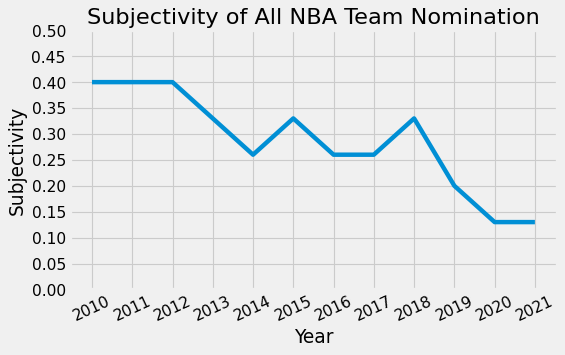

In [ ]:
# Plot "Subjectivity" from 2010 to 2021
# Subjectivity is given by Error/15
# The lower, the better
data = {'Subjectivity': [0.4, 0.4, 0.4, 0.33, 0.26, 0.33, 0.26, 0.26, 0.33, 0.2, 0.13, 0.13], 
        'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016 , 2017, 2018, 2019, 2020, 2021]}
df = pd.DataFrame(data)
from matplotlib.pyplot import figure
figure(figsize=(7, 4), dpi=80) 
ax = sns.lineplot(x = 'Year', y = 'Subjectivity', data = data)
plt.title('Subjectivity of All NBA Team Nomination')
plt.xticks(range(2010,2022,1),rotation = 25)
plt.yticks(np.arange(0,0.55,0.05))
plt.show()

## Machine Learning model 
- Using advanced stats from 2010~2021
- Predict whether a player would be a member of all NBA team selection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Advanced_Stats_20102021.csv to Advanced_Stats_20102021.csv


In [ ]:
pd.set_option('display.max_columns', None)
df2 = pd.read_csv('Advanced_Stats_20102021.csv')
print(df2.shape)
df2.head()

(6204, 28)


,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
0,1,Arron Afflalo,SG,24,DEN,82,2221,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9,0
1,2,Alexis Ajinça,C,21,CHA,6,30,6.3,0.479,0.000,0.100,4.1,11.8,8.0,0.0,1.8,2.7,16.1,19.3,-0.1,0.0,0.0,-0.013,-6.3,1.0,-5.3,0.0,0
2,3,LaMarcus Aldridge,PF,24,POR,78,2922,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,5.5,3.3,8.8,0.145,1.4,-0.2,1.2,2.3,0
3,4,Joe Alexander,SF,23,CHI,8,29,2.8,0.273,0.167,0.500,7.8,11.3,9.6,9.3,1.8,2.6,0.0,11.3,0.0,0.0,0.0,0.030,-9.1,0.9,-8.3,0.0,0
4,5,Malik Allen,PF,31,DEN,51,456,5.9,0.431,0.052,0.112,9.2,11.5,10.4,5.1,1.2,0.8,15.3,14.0,-0.3,0.3,0.1,0.009,-4.7,-1.0,-5.7,-0.4,0


In [ ]:
# Data cleaning, drop Pos, Rk, Player name and Team Name, as these features should not be affecting the model
df2 = df2.drop(columns = ['Rk','Player','Tm'])
df2.shape

(6204, 25)

In [ ]:
# Check null values
df2.isnull().sum()

Pos         0
Age         0
G           0
MP          0
PER         2
TS%        26
3PAr       26
FTr        26
ORB%        2
DRB%        2
TRB%        2
AST%        2
STL%        2
BLK%        2
TOV%       20
USG%        2
OWS         0
DWS         0
WS          0
WS/48       2
OBPM        0
DBPM        0
BPM         0
VORP        0
ALL NBA     0
dtype: int64

In [ ]:
df2 = df2.dropna(how = 'any', axis = 0)
print(df2.shape)
df2.head()

(6178, 25)


,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
0,SG,24,82,2221,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9,0
1,C,21,6,30,6.3,0.479,0.000,0.100,4.1,11.8,8.0,0.0,1.8,2.7,16.1,19.3,-0.1,0.0,0.0,-0.013,-6.3,1.0,-5.3,0.0,0
2,PF,24,78,2922,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,5.5,3.3,8.8,0.145,1.4,-0.2,1.2,2.3,0
3,SF,23,8,29,2.8,0.273,0.167,0.500,7.8,11.3,9.6,9.3,1.8,2.6,0.0,11.3,0.0,0.0,0.0,0.030,-9.1,0.9,-8.3,0.0,0
4,PF,31,51,456,5.9,0.431,0.052,0.112,9.2,11.5,10.4,5.1,1.2,0.8,15.3,14.0,-0.3,0.3,0.1,0.009,-4.7,-1.0,-5.7,-0.4,0


In [ ]:
le=LabelEncoder()
for col in df2.columns:
  if df2[col].dtype == object or df2[col].dtype==bool:
    df2[[col]] = df2[[col]].apply(le.fit_transform)
df2.head(10)

,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ALL NBA
0,11,24,82,2221,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9,0
1,0,21,6,30,6.3,0.479,0.000,0.100,4.1,11.8,8.0,0.0,1.8,2.7,16.1,19.3,-0.1,0.0,0.0,-0.013,-6.3,1.0,-5.3,0.0,0
2,2,24,78,2922,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,5.5,3.3,8.8,0.145,1.4,-0.2,1.2,2.3,0
3,7,23,8,29,2.8,0.273,0.167,0.500,7.8,11.3,9.6,9.3,1.8,2.6,0.0,11.3,0.0,0.0,0.0,0.030,-9.1,0.9,-8.3,0.0,0
4,2,31,51,456,5.9,0.431,0.052,0.112,9.2,11.5,10.4,5.1,1.2,0.8,15.3,14.0,-0.3,0.3,0.1,0.009,-4.7,-1.0,-5.7,-0.4,0
5,11,34,80,2819,15.2,0.601,0.410,0.260,2.0,8.8,5.5,12.3,1.2,0.7,10.6,20.2,5.1,2.9,7.9,0.135,1.5,-0.3,1.2,2.3,0
6,11,28,54,889,14.2,0.540,0.020,0.470,7.4,12.5,10.0,13.0,3.5,1.7,17.8,19.6,0.2,1.6,1.9,0.100,-1.8,2.2,0.4,0.5,0
7,5,33,52,1421,8.2,0.443,0.377,0.182,1.0,9.7,5.3,20.2,1.9,0.5,16.5,18.8,-1.6,1.2,-0.4,-0.013,-3.3,-0.5,-3.8,-0.6,0
8,5,33,27,766,8.7,0.436,0.314,0.195,1.3,10.4,5.6,23.1,1.9,0.5,16.9,21.7,-1.2,0.4,-0.8,-0.051,-3.0,-1.1,-4.0,-0.4,0
9,5,33,25,655,7.7,0.456,0.479,0.160,0.7,8.9,4.8,16.7,1.9,0.6,15.8,15.4,-0.4,0.8,0.4,0.031,-3.7,0.3,-3.4,-0.2,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6178 entries, 0 to 6203
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pos      6178 non-null   int64  
 1   Age      6178 non-null   int64  
 2   G        6178 non-null   int64  
 3   MP       6178 non-null   int64  
 4   PER      6178 non-null   float64
 5   TS%      6178 non-null   float64
 6   3PAr     6178 non-null   float64
 7   FTr      6178 non-null   float64
 8   ORB%     6178 non-null   float64
 9   DRB%     6178 non-null   float64
 10  TRB%     6178 non-null   float64
 11  AST%     6178 non-null   float64
 12  STL%     6178 non-null   float64
 13  BLK%     6178 non-null   float64
 14  TOV%     6178 non-null   float64
 15  USG%     6178 non-null   float64
 16  OWS      6178 non-null   float64
 17  DWS      6178 non-null   float64
 18  WS       6178 non-null   float64
 19  WS/48    6178 non-null   float64
 20  OBPM     6178 non-null   float64
 21  DBPM     6178 

In [ ]:
# See correlation
# corrmap = df2.corr()
# top_corr_features = corrmap.index
# plt.figure(figsize=(20,20))
# corr_heatmap = sns.heatmap(df2[top_corr_features].corr(), annot = True , cmap = "YlGnBu")

In [ ]:
from google.colab import files
files.download("heatmap.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Feature selection using "mutual_info_classif" for classification model
bestfeatures = SelectKBest(score_func=mutual_info_classif, k= df2.shape[1]-1)
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score'] 

data=featureScores.nlargest(df2.shape[1]-1,'Score')
data

,Features,Score
23,VORP,0.075987
18,WS,0.073239
16,OWS,0.063604
22,BPM,0.058098
4,PER,0.057241
20,OBPM,0.052282
19,WS/48,0.051264
17,DWS,0.049540
3,MP,0.042529
15,USG%,0.035262


In [ ]:
# drop age based on feature selection
df2 = df2.drop(columns = ['Age','Pos'])
df2.shape

(6178, 23)

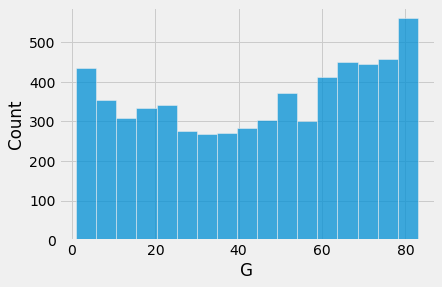

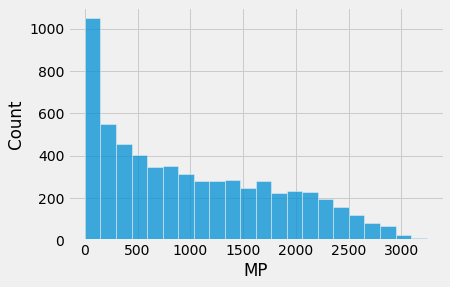

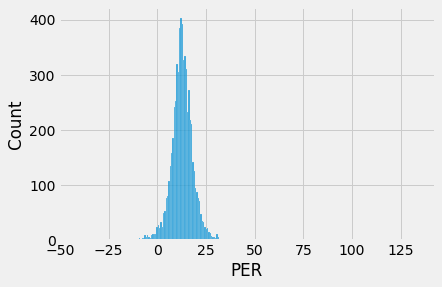

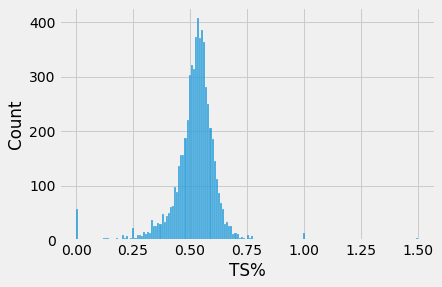

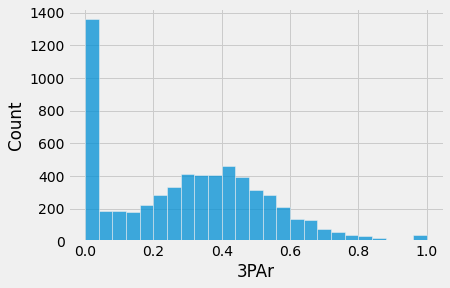

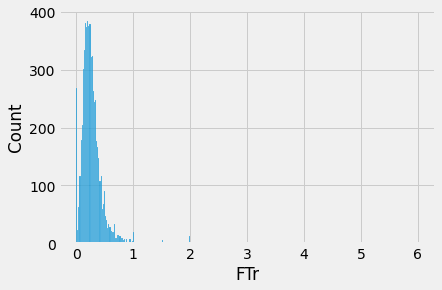

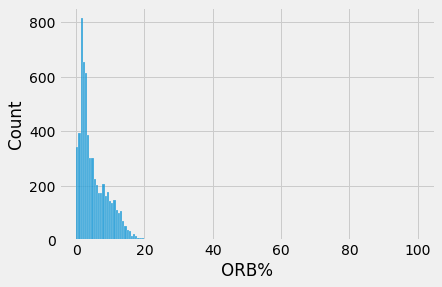

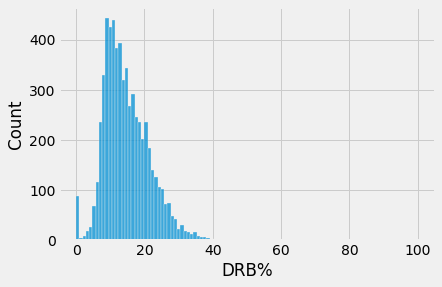

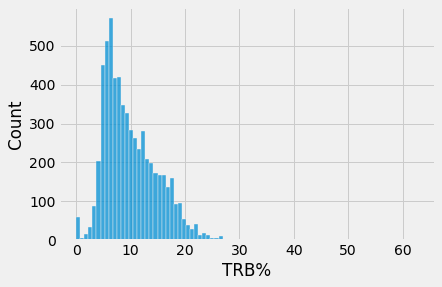

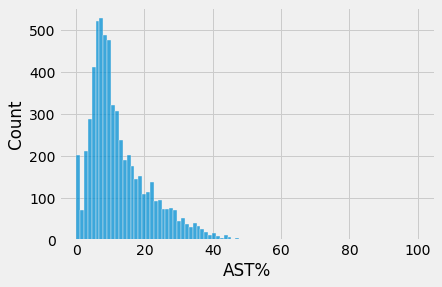

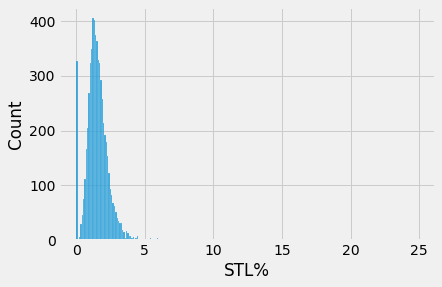

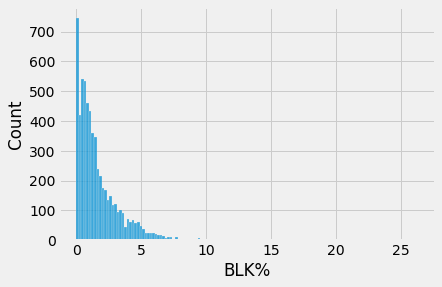

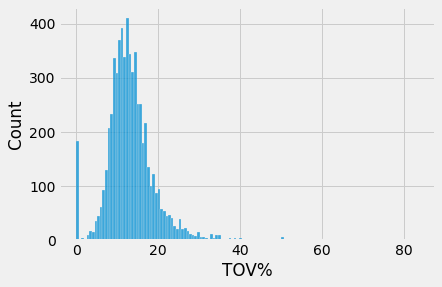

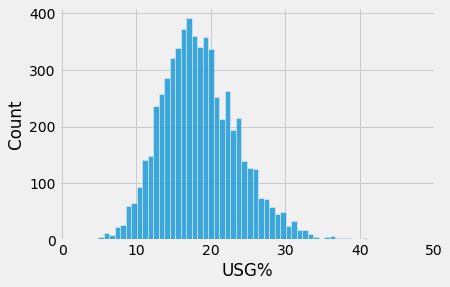

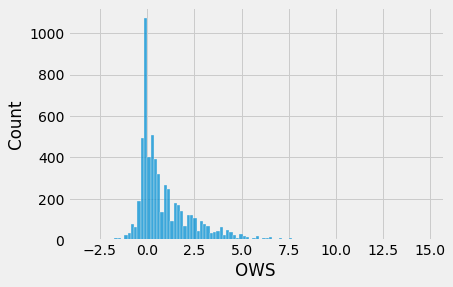

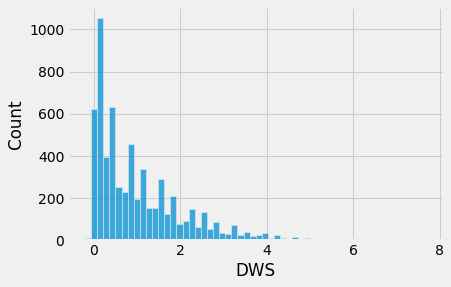

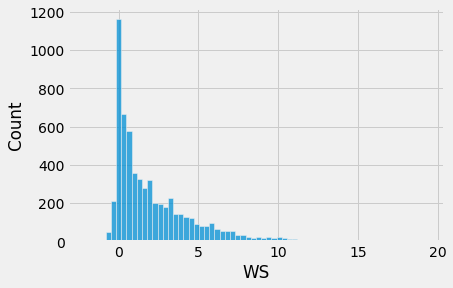

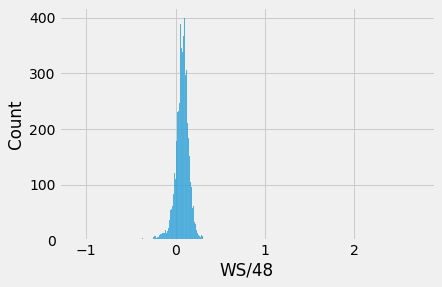

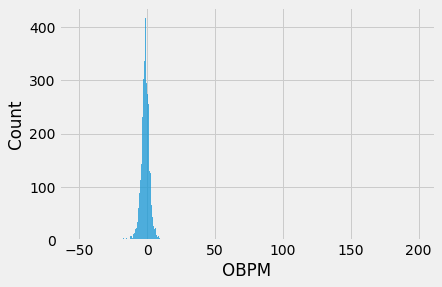

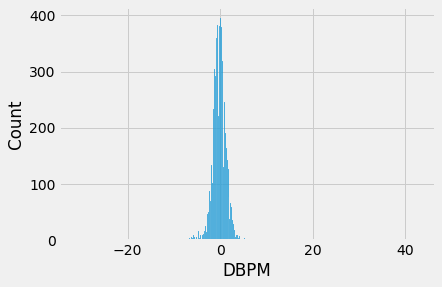

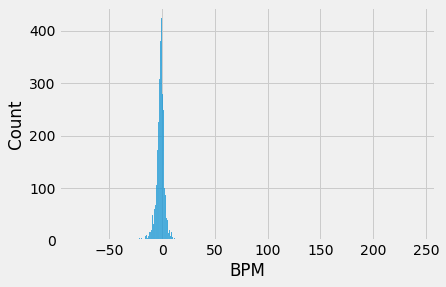

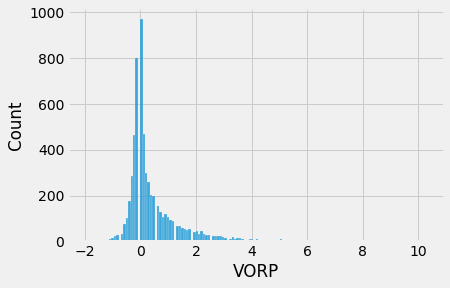

In [ ]:
# Check distribution for feature scaling by visualizing
for col in df2.columns[0:-1]:
  if df2[col].dtype == 'int64':
    sns.histplot(x = col, data = df2)
    plt.show()
  if df2[col].dtype == 'float64':
    sns.histplot(df2[col])
    plt.show()

In [ ]:
df2.columns

Index(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'ALL NBA'],
      dtype='object')

In [ ]:
# X = df2.iloc[:,:-1]
# y = df2.iloc[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train_non_norm = X_train[['G', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'OWS', 'DWS', 'WS', 'VORP']]
X_train_norm = X_train[['PER', 'TS%', 'USG%', 'WS/48','OBPM', 'DBPM', 'BPM']]

X_test_non_norm = X_test[['G', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'OWS', 'DWS', 'WS', 'VORP']]
X_test_norm = X_test[['PER', 'TS%', 'USG%', 'WS/48','OBPM', 'DBPM', 'BPM']]

In [ ]:
# Scale the data that are not gaussian dist
MMscaler = MinMaxScaler() 
X_train_non_norm_scaled = MMscaler.fit_transform(X_train_non_norm) 
X_test_non_norm_scaled = MMscaler.fit_transform(X_test_non_norm) 

In [ ]:
# Scale the data that are gaussian dist
STscaler = StandardScaler()
X_train_norm_scaled = STscaler.fit_transform(X_train_norm)
X_test_norm_scaled = STscaler.fit_transform(X_test_norm) 

In [ ]:
X_train_non_norm_scaled = pd.DataFrame(X_train_non_norm_scaled)
X_test_non_norm_scaled = pd.DataFrame(X_test_non_norm_scaled)

X_train_norm_scaled = pd.DataFrame(X_train_norm_scaled)
X_test_norm_scaled = pd.DataFrame(X_test_norm_scaled)

In [ ]:
n_X_train = pd.concat([X_train_non_norm_scaled, X_train_norm_scaled], axis = 1)
n_X_test = pd.concat([X_test_non_norm_scaled, X_test_norm_scaled], axis = 1)

In [ ]:
print(X_test_norm_scaled.shape)
print(X_test_non_norm_scaled.shape)
print(n_X_train.shape)

(1854, 7)
(1854, 15)
(4324, 22)


In [ ]:
# Scale the data 
# scaler = StandardScaler() 
# X_train_scaled = scaler.fit_transform(X_train) 
# X_test_scaled = scaler.fit_transform(X_test) 

'The accuracy of using normalization without checking distribution is lower....the accuracy is around 91%'

In [ ]:
# Feature selection 
bestfeatures = SelectKBest(score_func=mutual_info_regression, k= df2.shape[1]-1)
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score'] 
# print(featureScores.nlargest(df2.shape[1]-1,'Score')) 
data=featureScores.nlargest(df2.shape[1]-1,'Score')
data

'Do not run this cell, the score function is incorrect. mutual_info_regression is used for regression model'

In [ ]:
def models(X_train, y_train, X_test, y_test):

  dtclf = DecisionTreeClassifier(max_depth = 4, criterion='entropy')
  dtclf.fit(X_train, y_train)
  y_pred_train = dtclf.predict(X_train)
  y_pred_test = dtclf.predict(X_test)
  print('Decision Tree Testing set accuracy: ', accuracy_score(y_test, y_pred_test))

  logit = LogisticRegression()
  logit.fit(X_train, y_train)
  y_pred_train = logit.predict(X_train)
  y_pred_test = logit.predict(X_test)
  print('Logistic Regression Testing set accuracy: ',accuracy_score(y_test, y_pred_test))
  
  SVM = svm.SVC(kernel = 'poly', C = 2)
  SVM.fit(X_train, y_train)
  y_pred_train = SVM.predict(X_train)
  y_pred_test = SVM.predict(X_test)
  print('SVM Testing set accuracy: ', accuracy_score(y_test, y_pred_test))

In [ ]:
# models(X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
models(n_X_train, y_train, n_X_test, y_test)

Decision Tree Testing set accuracy:  0.9854368932038835
Logistic Regression Testing set accuracy:  0.9870550161812298
SVM Testing set accuracy:  0.9881337648327939


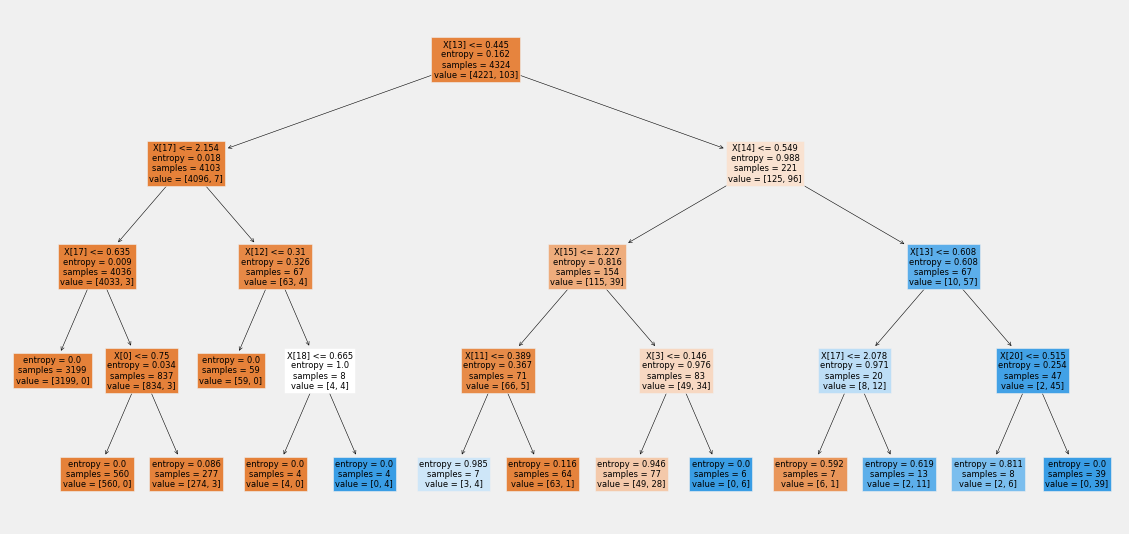

The number of terminal nodes:  14


In [ ]:
from sklearn import tree
from matplotlib.pyplot import figure
figure(figsize=(16, 8), dpi=80) 

clf = DecisionTreeClassifier(criterion='entropy',random_state = 0, max_depth = 4)
tree_plot = clf.fit(n_X_train, y_train)
tree.plot_tree(tree_plot,filled = True)
plt.show()

print('The number of terminal nodes: ',clf.get_n_leaves())